In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import IPython.display as display
from IPython.display import clear_output, display

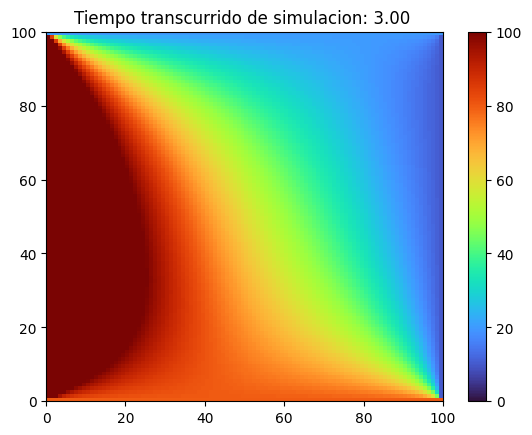

el tiempo que tardo el simulacion en correr es : -996.08 segundos
tiempo: 3.00 s, 
Temperatura promedio: 63.15 °C 

La temperatura por nodo es: 
 [[ 80.    80.    80.   ...  80.    80.    80.  ]
 [150.   114.97 101.11 ...  58.84  45.    10.  ]
 [150.   128.78 114.89 ...  45.02  31.17  10.  ]
 ...
 [150.   110.67  84.95 ...  15.07  13.06  10.  ]
 [150.    84.99  59.28 ...  17.01  15.02  10.  ]
 [ 20.    20.    20.   ...  20.    20.    20.  ]] °C


In [11]:
# constantes 
alfa = 113 ##mm^2 / s
nodes = 100

L = 50 #mm

t = 3 #s 

To = 20 # °C

#diferenciales 

dx = L / nodes
dy = L / nodes
dt = min(dx**2 / (4 * alfa), dy**2 / (4 * alfa))  # condicion de estabilidad
t_nodes = int(t / dt)

# temperatura inicial
T = np.ones((nodes, nodes)) + To

#condiciones de frontera

T[:,0] = 150 # °C
T[:,-1] = 10 # °C       
T[0,:] = 80 # °C
T[-1,:] = 20 # °C

# configuracion del grafico

fig, axis = plt.subplots()
mesh = axis.pcolormesh(T, cmap = "turbo", vmin=0,vmax = 100)
plt.colorbar(mesh, ax=axis)


#el tiempo inicial real

start_time = time.time()

#Simulacion

counter = 0

while counter < t:
    w = T.copy()

    for i in range(1,nodes-1):
        for j in range(1, nodes-1):
            ddTx = (w[i - 1, j] - 2 * w[i,j] + w[i +1,j]) / dx**2
            ddTy = (w[i,j - 1] - 2 * w[i,j] + w[i,j + 1]) / dy**2
            T [i,j] = alfa * (ddTx + ddTy) * dt + w[i,j]

    counter += dt
# actualizar el grafico
    mesh.set_array(T)
    axis.set_title(f'Tiempo transcurrido de simulacion: {counter:<.2f} ')
    clear_output(wait = True)
    display(fig)

# temperatura individual por nodo

T_per_node = np.round(T,decimals=2)

# cerrar el grafico final

plt.close()


#el tiempo REAL total
end_time = time.time()
print(f"el tiempo que tardo el simulacion en correr es : {start_time - end_time:<.2f} segundos")

#resumen de sultados 

print(f"tiempo: {counter:<.2f} s, \nTemperatura promedio: {np.average(T):<.2f} °C \n" ) 
print(f"La temperatura por nodo es: \n {T_per_node} °C")
